In [1]:
import json

# Passe den Dateipfad entsprechend an
#file_path = '/home/mmo-cya/dpsim/python/src/dpsim/Config_IEEE14.json'
file_path = "/home/mmo-cya/dpsim/python/src/dpsim/Config_CIGRE_LineDisconnection.json"

try:
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        print(json.dumps(data, indent=4))
except FileNotFoundError:
    print(f"Die Datei '{file_path}' wurde nicht gefunden.")
except json.JSONDecodeError:
    print(f"Die Datei '{file_path}' ist keine gültige JSON-Datei.")



{
    "CIMFiles": [
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/CIGRE_MV/Rootnet_FULL_NE_24J13h_DI.xml",
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/CIGRE_MV/Rootnet_FULL_NE_24J13h_EQ.xml",
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/CIGRE_MV/Rootnet_FULL_NE_24J13h_SV.xml",
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/CIGRE_MV/Rootnet_FULL_NE_24J13h_TP.xml"
    ],
    "SolverParameters": {
        "Domain": "RMS",
        "Solver": "MNA"
    },
    "SimulationParameters": {
        "SimulationName": "CIGRE_LD",
        "StartTime": 0,
        "EndTime": 1.5,
        "TimeStep": 0.1,
        "InitFromPF": true
    },
    "Events": {
        "EventType": "LineDisconnection",
        "EventStartTime": 0,
        "EventEndTime": 10,
        "EventParameters": {
            "BreakerClosedResistance": 0.0001,
            "BreakerOpenResistance": 100000.0,
            "LineName": "L13-14",
            "LineTermina": "str"
        }
    },
    "Logger

CIM object Diagram created : 1 times
CIM object DiagramObject created : 71 times
CIM object DiagramObjectPoint created : 126 times
CIM object BaseVoltage created : 2 times
CIM object VoltageLevel created : 15 times
CIM object Substation created : 15 times
CIM object GeographicalRegion created : 1 times
CIM object SubGeographicalRegion created : 1 times
CIM object OperationalLimitType created : 2 times
CIM object EnergyConsumer created : 18 times
CIM object Terminal created : 47 times
CIM object ExternalNetworkInjection created : 1 times
CIM object ACLineSegment created : 12 times
CIM object OperationalLimitSet created : 16 times
CIM object CurrentLimit created : 48 times
CIM object PowerTransformer created : 2 times
CIM object PowerTransformerEnd created : 4 times
CIM object SvVoltage created : 15 times
CIM object SvPowerFlow created : 18 times
CIM object TopologicalNode created : 15 times
Created totally 430 CIM objects in 0.032172441482543945s


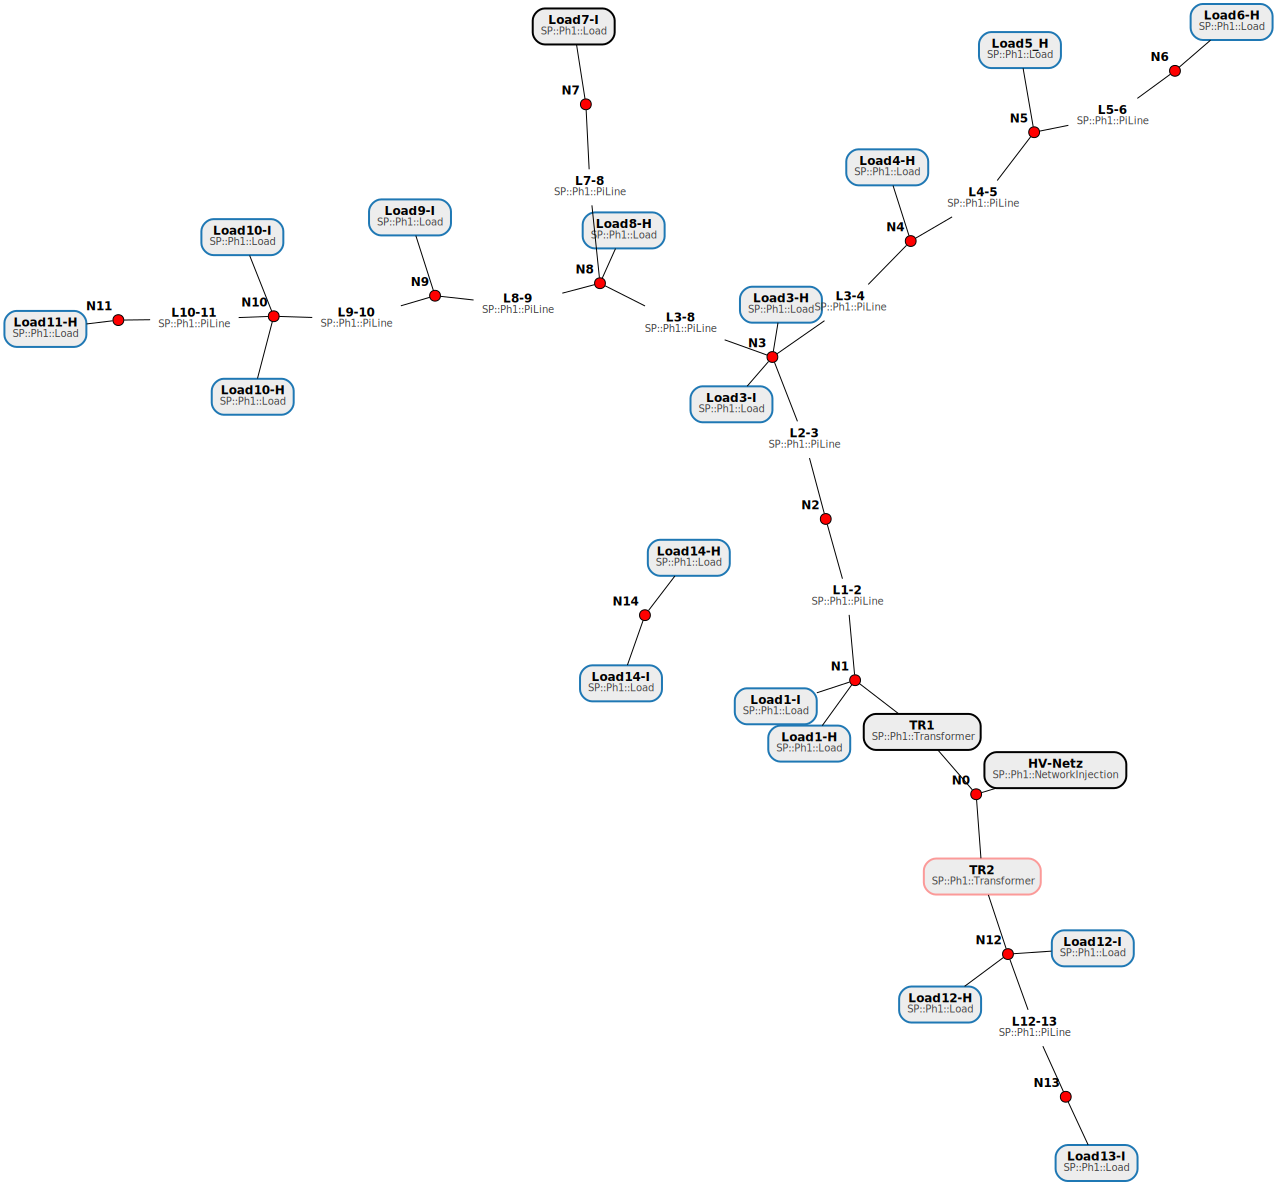

In [2]:
from DPsimLauncher import DPsimLauncher

DPsimLauncher(file_path)


In [3]:
import cimpy
from cimpy import CIM2DPsim
from cimpy.CIM2DPsim import Domain

imported_result = cimpy.cim_import(data['CIMFiles'], 'cgmes_v2_4_15')

CIM object Diagram created : 1 times
CIM object DiagramObject created : 71 times
CIM object DiagramObjectPoint created : 126 times
CIM object BaseVoltage created : 2 times
CIM object VoltageLevel created : 15 times
CIM object Substation created : 15 times
CIM object GeographicalRegion created : 1 times
CIM object SubGeographicalRegion created : 1 times
CIM object OperationalLimitType created : 2 times
CIM object EnergyConsumer created : 18 times
CIM object Terminal created : 47 times
CIM object ExternalNetworkInjection created : 1 times
CIM object ACLineSegment created : 12 times
CIM object OperationalLimitSet created : 16 times
CIM object CurrentLimit created : 48 times
CIM object PowerTransformer created : 2 times
CIM object PowerTransformerEnd created : 4 times
CIM object SvVoltage created : 15 times
CIM object SvPowerFlow created : 18 times
CIM object TopologicalNode created : 15 times
Created totally 430 CIM objects in 0.03460359573364258s


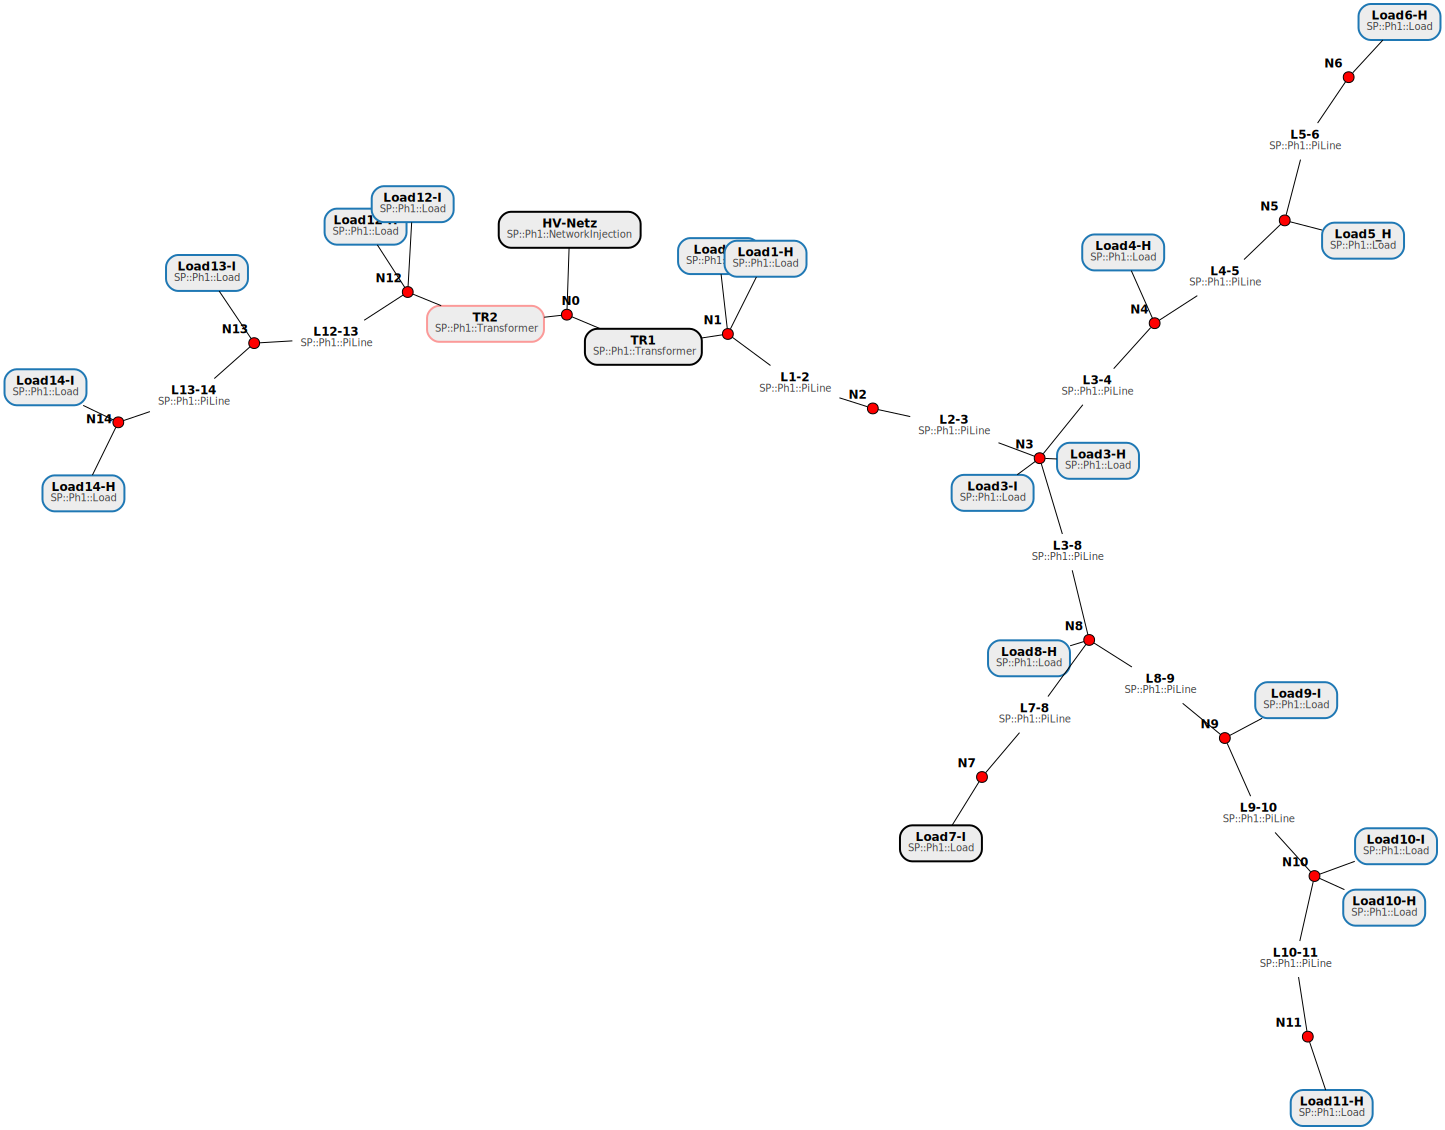

In [4]:
system_SP  = CIM2DPsim.CIM2DPsim(imported_result, Domain.PF)
system_SP

In [5]:
node = list(system_SP.components_at_node.keys())[0]
#system_SP.components_at_node[node] = []
system_SP.components_at_node[node]

In [6]:
for comp in system_SP.components:
    if "L13-14" == comp.name:
        print("HERE")
        #system_SP.components = [x for x in system_SP.components if x != comp]

        for key, value in system_SP.components_at_node.items():
            if comp in value:
                obj_dict = system_SP.components_at_node
                obj_dict[key] = [c for c in obj_dict[key] if c != comp]
                system_SP.components_at_node = obj_dict
                print(system_SP.components_at_node[key])

        

HERE
[<dpsimpy.sp.ph1.Load object at 0x7efdb607c1b0>, <dpsimpy.sp.ph1.Load object at 0x7efdb6176470>]
[<dpsimpy.sp.ph1.Load object at 0x7efdb607c670>, <dpsimpy.sp.ph1.PiLine object at 0x7efdb60827f0>]


In [7]:
for comp in system_SP.components:
    if "L13-14" == comp.name:
        print("HERE")
        system_SP.components = [x for x in system_SP.components if x != comp]
        for node in system_SP.nodes:
            if node.name == "N14":
                print("Yes")
                print(system_SP.components_at_node[node])
                
                obj_dict = system_SP.components_at_node
                obj_dict[node] = [c for c in obj_dict[node] if c != comp]
                system_SP.components_at_node = obj_dict
                print(type(obj_dict))
                print(system_SP.components_at_node[node])
                
        


HERE
Yes
[<dpsimpy.sp.ph1.Load object at 0x7efdb607c1b0>, <dpsimpy.sp.ph1.Load object at 0x7efdb6176470>]
<class 'dict'>
[<dpsimpy.sp.ph1.Load object at 0x7efdb607c1b0>, <dpsimpy.sp.ph1.Load object at 0x7efdb6176470>]


32


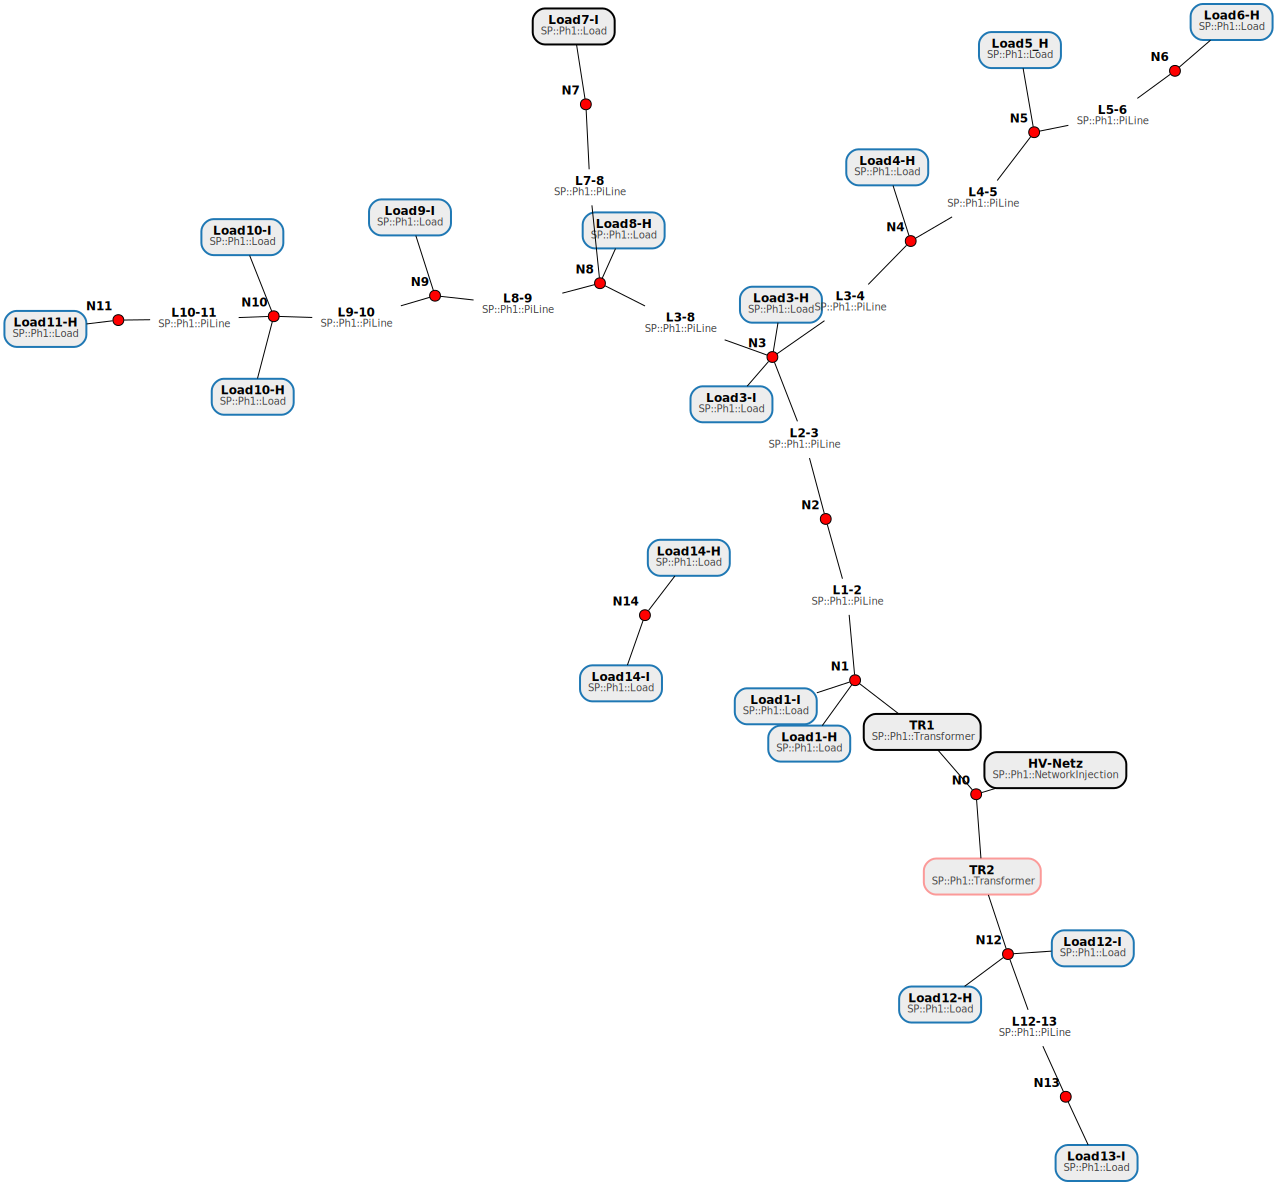

In [8]:

print(len(system_SP.components))
system_SP